In [1]:
%matplotlib inline


# Read and plot an image from a FITS file


This example opens an image stored in a FITS file and displays it to the screen.

This example uses `astropy.utils.data` to download the file, `astropy.io.fits` to open
the file, and `matplotlib.pyplot` to display the image.

-------------------

*By: Lia R. Corrales, Adrian Price-Whelan, Kelle Cruz*

*License: BSD*

-------------------




Set up matplotlib and use a nicer set of plot parameters and os 



In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import astropy_mpl_style
plt.style.use(astropy_mpl_style)

Download the example FITS files used by this example:



In [3]:
from astropy.utils.data import get_pkg_data_filename
from astropy.io import fits

image_file = get_pkg_data_filename('/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/CadmiumTestNolight_0006.fit')

Use `astropy.io.fits.info()` to display the structure of the file:



In [4]:
fits.info(image_file)

Filename: \Users\Edward\Documents\year 2\lab project\Ed-Em-Y2Spec\CadmiumTestNolight_0006.fit
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (800, 596)   int16 (rescales to uint16)   


Generally the image information is located in the Primary HDU, also known
as extension 0. Here, we use `astropy.io.fits.getdata()` to read the image
data from this first extension using the keyword argument ``ext=0``:



In [5]:
image_data = fits.getdata(image_file, ext=0)

The data is now stored as a 2D numpy array. Print the dimensions using the
shape attribute:



In [6]:
print(image_data.shape)
print(image_data)

(596, 800)
[[2441 2473 2462 ... 2443 2472 2468]
 [2437 2450 2460 ... 2422 2435 2471]
 [2480 2467 2432 ... 2446 2460 2460]
 ...
 [2465 2456 2438 ... 2471 2488 2478]
 [2467 2443 2475 ... 2445 2444 2484]
 [2454 2445 2449 ...    0    0    0]]


Display the image data:



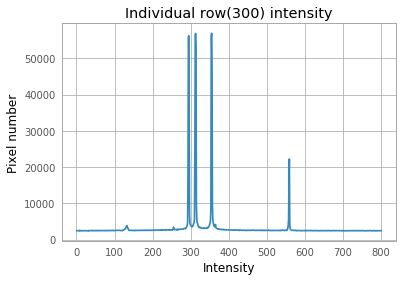

In [7]:
x = np.linspace(1,800, 800)
y = image_data[300]
plt.title('Individual row(300) intensity')
plt.xlabel('Intensity')
plt.ylabel('Pixel number')
# np.amin and np.amax return the maximum and minimum values of an array respectively
#plt.axis([np.amin(x), np.amax(x), 0, 4/3*np.amax(potential_array)])
plt.plot(x, y)
plt.show()

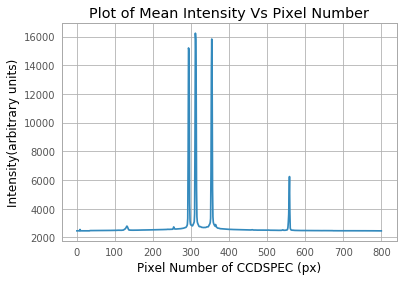

In [8]:

x = np.linspace(1,800, 800)
y = np.mean(image_data, axis = 0)
plt.title('Plot of Mean Intensity Vs Pixel Number')
plt.xlabel(r'Pixel Number of CCDSPEC (px)')
plt.ylabel(r'Intensity(arbitrary units)')
# np.amin and np.amax return the maximum and minimum values of an array respectively
#plt.axis([np.amin(x), np.amax(x), 0, 4/3*np.amax(potential_array)])
plt.plot(x, y)
plt.show()



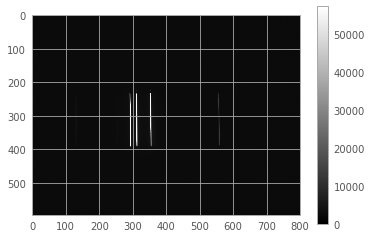

In [9]:
plt.figure()
plt.imshow(image_data, cmap='gray')
plt.colorbar()

Import the files into jupyter

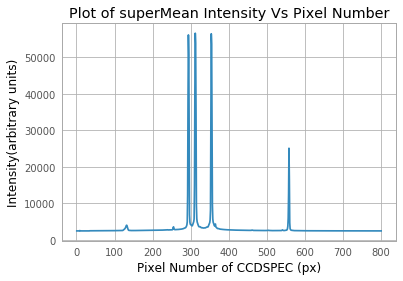

100
0.0
0.0
0.0
0.0


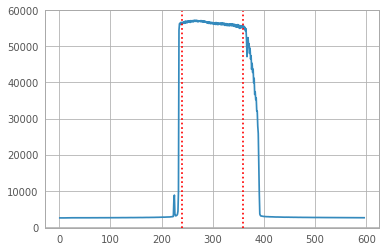

In [10]:
tracks = []
n = 0
for i in os.listdir('/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Cadmium calibration data/'):
    if i.endswith(".fit"):
        n += 1
        filename1 = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Cadmium calibration data/'
        filename2 = i
        filename = '/Users/Edward/Documents/year 2/lab project/Ed-Em-Y2Spec/Cadmium calibration data/'+ str(i)

        image_file = get_pkg_data_filename(filename)

        image_data = fits.getdata(image_file, ext=0)
        
        tracks.append(image_data)

#print(tracks)        
mean = np.mean(tracks, axis = 0) #gets the mean of every single list, compiling it into a mean picture
snipmean = mean[240:360]

x = np.linspace(1,800, 800)
y = np.mean(snipmean, axis = 0)
#print(y)
plt.title('Plot of superMean Intensity Vs Pixel Number')
plt.xlabel(r'Pixel Number of CCDSPEC (px)')
plt.ylabel(r'Intensity(arbitrary units)')
# np.amin and np.amax return the maximum and minimum values of an array respectively
#plt.axis([np.amin(x), np.amax(x), 0, 4/3*np.amax(potential_array)])
plt.plot(x, y)
plt.show()
print(n)

'''new stuff here'''
#show this with varience or with a plot

QQ=len(mean)
thirdline = mean[:,353]
x1 = np.linspace(1,QQ,QQ)
plt.plot(x1, thirdline)
plt.axvline(x= 240,linestyle=':', color = 'r', label='f0')
plt.axvline(x= 360,linestyle=':', color = 'r', label='f0')

k = 240
maxpointsl1=[]
while k <360:
    peak = np.argmax(y[200:300]) + 200
    maxpointsl1.append(peak)
    k += 1
print(np.var(maxpointsl1))

k = 240
maxpointsl2=[]
while k <360:
    peak = np.argmax(y[300:330]) + 300
    maxpointsl2.append(peak)
    k += 1
print(np.var(maxpointsl2))

k = 240
maxpointsl3=[]
while k <360:
    peak = np.argmax(y[330:400]) + 330
    maxpointsl3.append(peak)
    k += 1
print(np.var(maxpointsl3))

k = 240
maxpointsl4=[]
while k <360:
    peak = np.argmax(y[500:600]) + 500
    maxpointsl4.append(peak)
    k += 1
print(np.var(maxpointsl4))

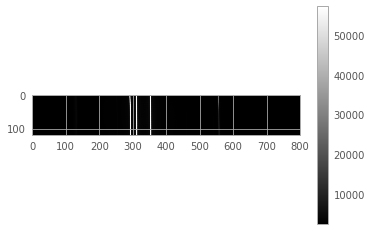

In [11]:
plt.figure()
plt.imshow(snipmean, cmap='gray')
plt.colorbar()

In [12]:
px1 = np.argmax(y[200:300]) + 200
px2 = np.argmax(y[0:340])
px3 = np.argmax(y[330:400]) + 330
px4 = np.argmax(y[500:600]) + 500
print(px1)
print(px2)
print(px3)
print(px4)

293
311
353
557


In [13]:
A=6.6397736*10**-10
B=2.7355748*10**-7
x1=293
x2=311
x3=354
x4=558
y1=467.94581*10**-9
y2=480.12521*10**-9
y3=508.72379*10**-9
y4=644.02480*10**-9
dx = 1
dy = 1*10**-14
x=np.linspace(293,558,266)
y=A*x+B


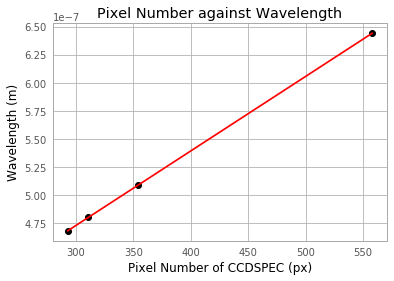

In [14]:
plt.title('Pixel Number against Wavelength')
plt.xlabel(r'Pixel Number of CCDSPEC (px)')
plt.ylabel(r'Wavelength (m)')
plt.plot(x1,y1,'ko')
plt.plot(x2,y2,'ko')
plt.plot(x3,y3,'ko')
plt.plot(x4,y4,'ko')
plt.plot(x,y,'r')
plt.show()

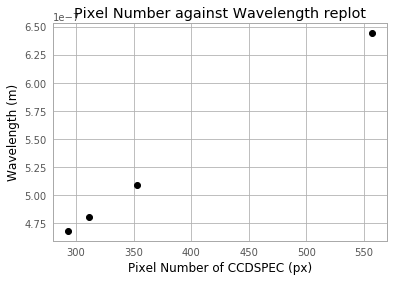

In [15]:
x3=353
x4=557
plt.title('Pixel Number against Wavelength replot')
plt.xlabel(r'Pixel Number of CCDSPEC (px)')
plt.ylabel(r'Wavelength (m)')
plt.plot(x1,y1,'ko')
plt.plot(x2,y2,'ko')
plt.plot(x3,y3,'ko')
plt.plot(x4,y4,'ko')
plt.show()